In [38]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from tools import read_video_frames
plt.gray()

<Figure size 640x480 with 0 Axes>

In [3]:
frames = read_video_frames("/Users/hendricpopma/Documents/Uni/Uni_6_Sem/Bums/test_videos/kempten1.MOV")

In [4]:
frames = frames[0:200]

pca to remove background? 
Knn with components or with distance between lines (vertical)
hog and Knn for the value

In [53]:
def find_center_add_line(img):
    #convert to grayscale 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gauss 
    gauss = cv2.GaussianBlur(img, None, 10)
    t, seg = cv2.threshold(gauss,200,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU) #streifen = 200
    # contours
    cnts, hierachy = cv2.findContours(seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    out = np.zeros(np.shape(img), dtype='uint8')
    area = []
    for cnt in cnts:
        area.append(cv2.contourArea(cnt))
    c_idx = area.index(max(area))

    cv2.drawContours(out, cnts, c_idx, [255,255,255], cv2.FILLED)
    #find center of ther contour
    m = cv2.moments(cnts[c_idx])
    cX = int(m["m10"] / m["m00"])
    cY = int(m["m01"] / m["m00"])
    center_img = (cX, cY)
    res = cv2.circle(out, (cX, cY),50, [0,0,0], cv2.FILLED)
    #TODO  add size of image for borders line
    center_line = [cX,0,cX,4000]
    cv2.line(res, (cX,0),(cX,4000), [0, 0, 0], 10)
    
    return res, center_img, center_line


In [105]:
img_1, center_1 = find_center_add_line(frames[1][1])

ValueError: too many values to unpack (expected 2)

556

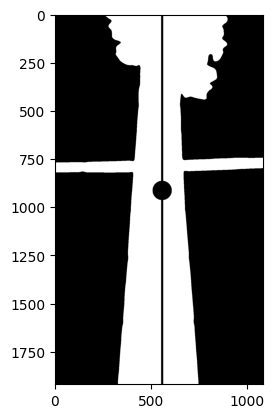

In [103]:
img_2, center_2, center_line = find_center_add_line(frames[100][1])
#cv2.circle(img_2, center_1, 100, [255,0,0], cv2.FILLED)
plt.imshow(img_2)
center_2[0]

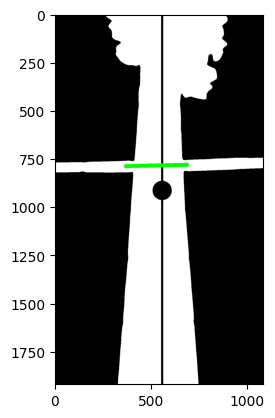

In [104]:
canny = cv2.Canny(img_2, 0, 0)
plt.imshow(canny)
linesh = cv2.HoughLinesP(canny, 1, np.pi/180, 60,
                        minLineLength=100, maxLineGap=250)

lines=np.squeeze(linesh)
black_new = cv2.merge((img_2, img_2, img_2))
# for (x1,y1,x2,y2) in lines:
#     #find horizontal lines
#     if abs(x1-x2) > 200:
#         cv2.line(black_new, (x1,y1), (x2,y2), (255,0,0), 20)
# plt.imshow(black_new)

x11 = []
x22 = []
y11 = []
y22 = []
for (x1,y1,x2,y2) in lines:
    #find horizontal lines
    if abs(x1-x2) > 200:
        x11.append(x1)
        x22.append(x2)
        y11.append(y1)
        y22.append(y2)
x11 = np.array(x11)
y11 = np.array(y11)
x22 = np.array(x22)
y22 = np.array(y22)
cv2.line(black_new, (int(x11.mean()),int(y11.mean())), (int(x22.mean()), int(y22.mean())), (0,255,0), 20)
plt.imshow(black_new)


In [ ]:
x11.mean()
x22.mean()

In [55]:
# find longest line vertical 
diffx = []
for (x1,_,x2,_) in lines:
    diffx.append(x2-x1)
llinex = lines[diffx.index(max(diffx))]

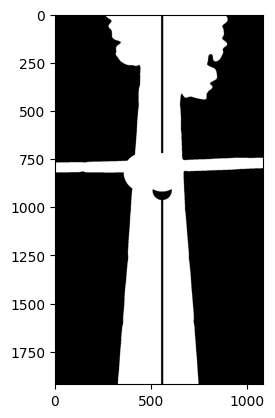

In [79]:
#find intersections from script with offset line 
# so we get two/three intersections left and rigth from the "masterline"
def find_intersection(l1, l2, offset):
    x1=l1[0]; y1=l1[1]
    x2=l1[2]; y2=l1[3]
    x3=l2[0]+offset; y3=l2[1]
    x4=l2[2]+offset; y4=l2[3]
    denom=(x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    #print(denom)
    if(denom):
        px=((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4))/denom 
        py=((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4))/denom
    else: 
        px=-1
        py=-1
    return (px,py)
sy,sx=img_2.shape
px=[]
py=[]
for x in range(-100,100,100):
    p=find_intersection(llinex,center_line,x)
    if(p[0]>0 and p[0]<sx and p[1]>0 and p[1]<sy):
        px.append(p[0])
        py.append(p[1])

#res = final.copy()
for x in range(len(px)):
    blank = cv2.circle(img_2, (px[x].astype('int'), py[x].astype('int')),100, [255,255,255], cv2.FILLED)
plt.imshow(blank)

In [80]:
#line to right or left
if px[0] - px[1] < 0: 
    print("go left")
elif px[0] - px[1] > 0: 
    print("go right")
if len(px) > 2:
    print("you can go left or right") 

go left
